In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score as sil_score
from sklearn.metrics import balanced_accuracy_score, RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.base import clone
from sklearn import metrics
import seaborn

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from collections import Counter
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [12]:
# Other imports for decision trees
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import io
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [13]:
df = pd.read_csv('diabetes.csv')
y_col, x_col = df.columns[0], df.columns[1::]

In [14]:
Counter(df[y_col])

Counter({1: 135,
         0: 111,
         2: 103,
         3: 75,
         4: 68,
         5: 57,
         6: 50,
         7: 45,
         8: 38,
         9: 28,
         10: 24,
         11: 11,
         13: 10,
         12: 9,
         14: 2,
         15: 1,
         17: 1})

In [15]:
df_y = df['Outcome']
df = pd.DataFrame(df[x_col])
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


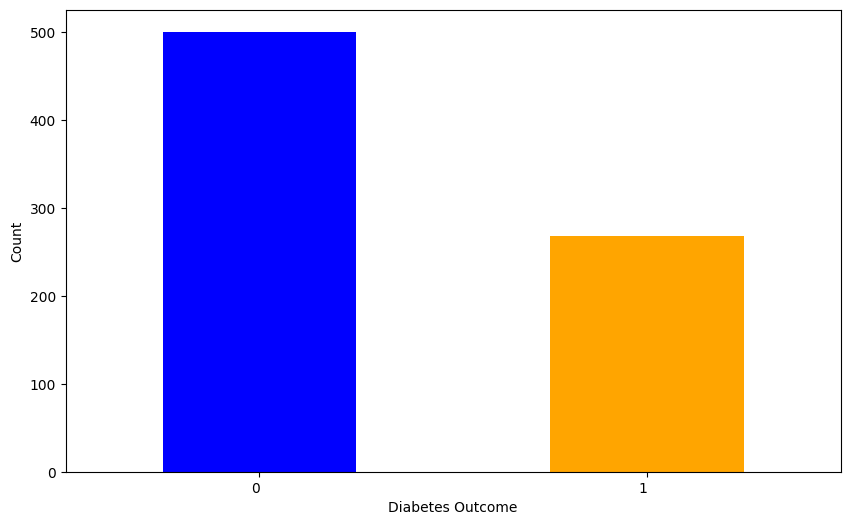

In [16]:
value_counts = df_y.value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Diabetes Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [17]:
df_y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [19]:
def plot_num_summary(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_cols_names(dataframe)
    plt.figure(figsize=(10,4))
    for index, col in enumerate(num_cols):
        plt.subplot(2, 4, index+1)
        plt.tight_layout()
        dataframe[col].hist(bins=20)
        plt.title(col)



IndentationError: expected an indented block after 'for' statement on line 4 (3134155559.py, line 5)

In [9]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [10]:
df.shape

(768, 8)

In [11]:
x, y = df[df.columns[0:-2]], df[df.columns[-2::]]

In [12]:
y_total_data = []
ydata = []

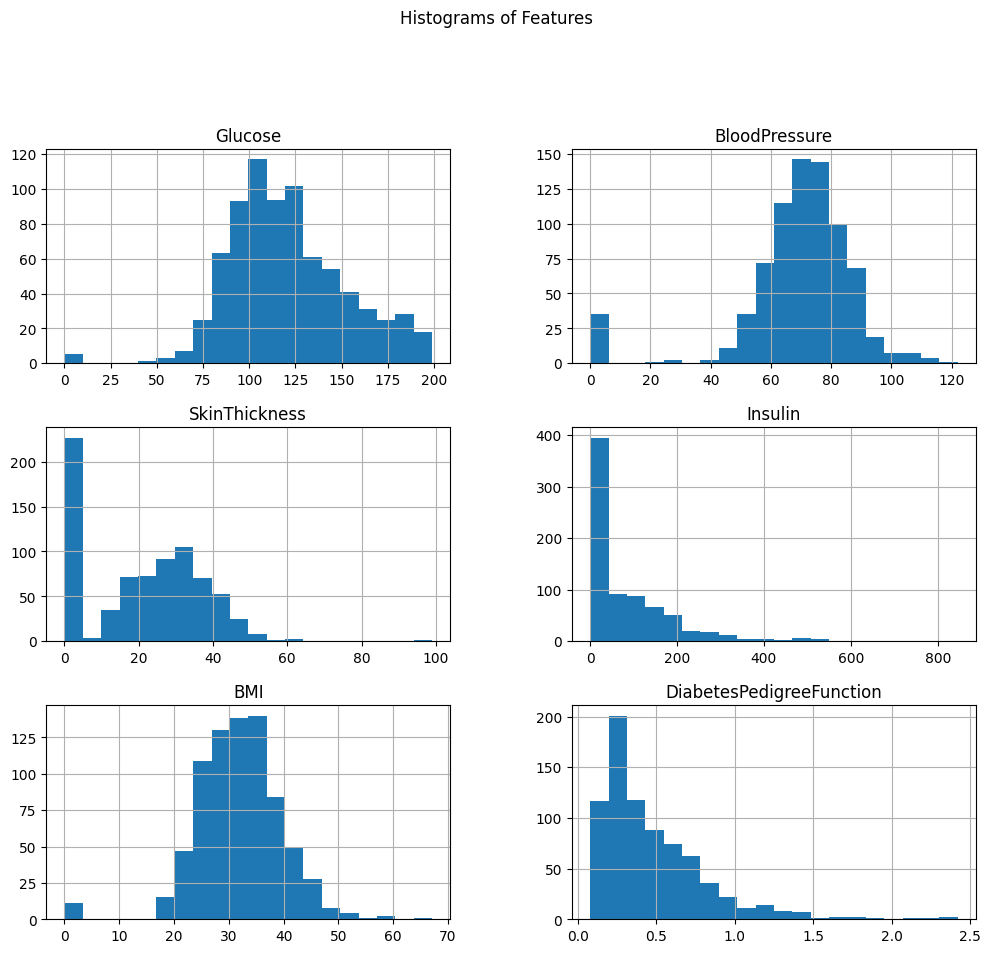

In [28]:
x.hist(figsize=(12, 10), bins=20)  # You can adjust figsize and bins based on your preference
plt.suptitle('Histograms of Features', y=1.02)
plt.show()

In [14]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y['Outcome'], test_size=0.2, random_state=42)

In [15]:
print(Counter(y_tr))
print(Counter(y_te))

Counter({0: 401, 1: 213})
Counter({0: 99, 1: 55})


In [16]:
# Confusion Matrix Function
def make_confusion_matrix(test, pred):
    conf_mat = confusion_matrix(test, pred)
    plt.figure(figsize=(8, 8))
    ax = seaborn.heatmap(conf_mat, annot=True,
        cmap=plt.cm.GnBu, fmt='g', 
        linewidths=0.1, linecolor='black')
    ax.xaxis.set_ticklabels(['False', 'True'], fontsize=14)
    ax.yaxis.set_ticklabels(['False', 'True'], fontsize=14)
    ax.set_xlabel('Predictions', fontsize=18)
    ax.set_ylabel('Actuals', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=18)
    plt.show()

#ROC Curve Function
def make_roc_curve(model, label):
    pred_prob = model.predict_proba(x_te)[:,1]
    fpr1, tpr1, _a = roc_curve(y_te, pred_prob, pos_label=1)
    random_probs = [0 for i in range(len(y_te))]
    p_fpr, p_tpr, _b = roc_curve(y_te, random_probs, pos_label=1)
    auc_score = roc_auc_score(y_te, pred_prob)
    print("AUC Score: ", auc_score)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr1, tpr1, color='blue', label=label)
    plt.plot(p_fpr, p_tpr, color='red', alpha=0.5)
    plt.title('ROC Curve', fontsize=18)
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.legend(bbox_to_anchor=(0, 0, 1, 1), loc='lower right')
    plt.grid(color='b', ls = '-', lw=0.25)
    plt.show()




Logisitic Regression Accuracy:  0.7402597402597403


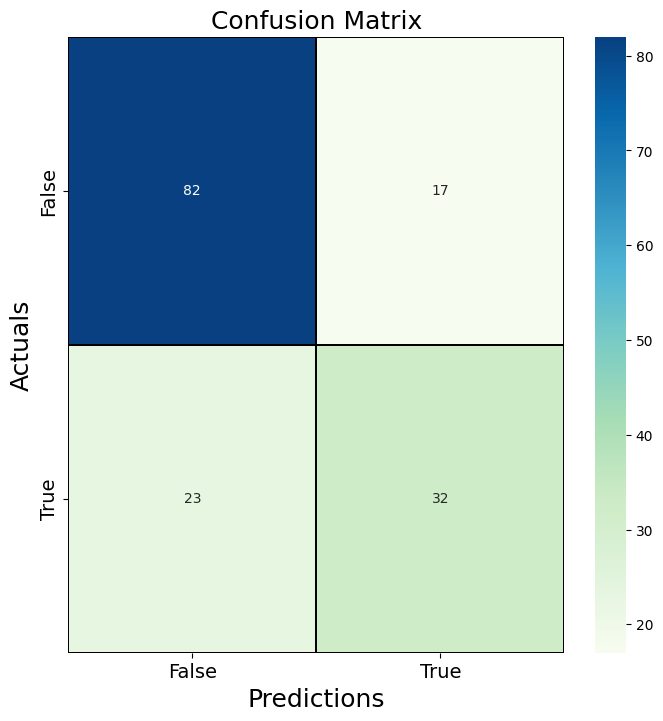

AUC Score:  0.8124885215794306


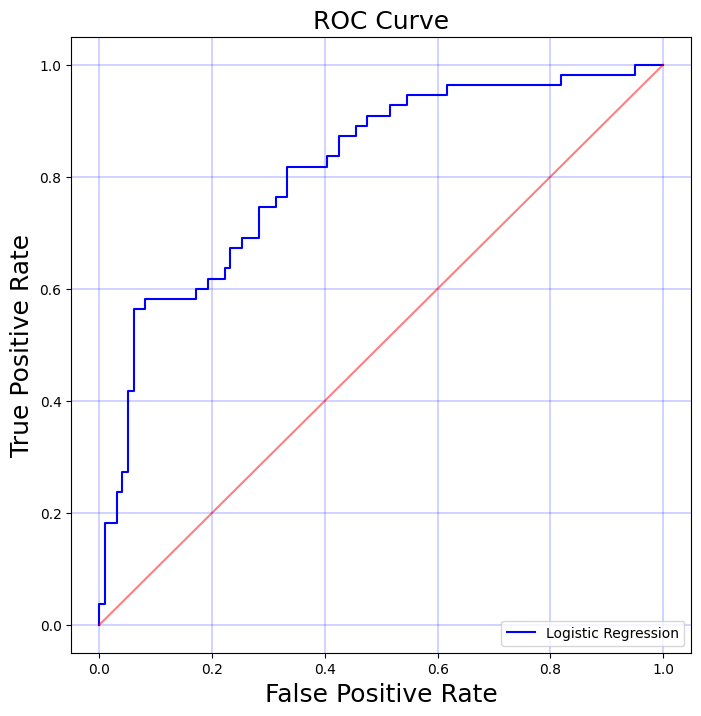

In [17]:

# Sid Logistic Regression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_tr, y_tr)

logPreds = logisticRegr.predict(x_te)
print("Logisitic Regression Accuracy: ", metrics.accuracy_score(y_te, logPreds))
make_confusion_matrix(y_te, logPreds)

make_roc_curve(logisticRegr, "Logistic Regression")



Random Forest Accuracy:  0.7337662337662337


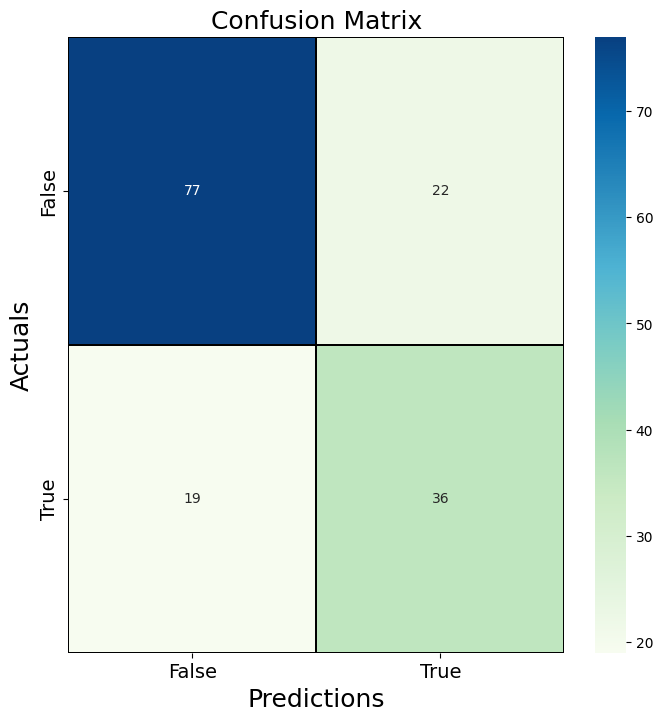

AUC Score:  0.7908172635445363


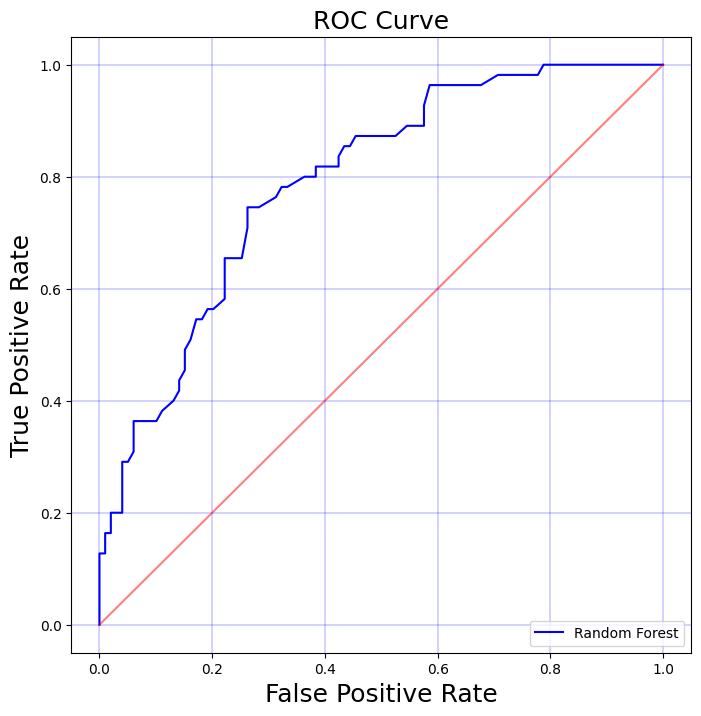

In [18]:
# Judd Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(x_tr, y_tr)

pred = forest.predict(x_te)
print("Random Forest Accuracy: ", metrics.accuracy_score(y_te, pred))
make_confusion_matrix(y_te, pred)

make_roc_curve(forest, "Random Forest")


In [19]:
from sklearn import svm as SupportVectorMachine
from sklearn.metrics import roc_curve, auc

Support Vector Machine Accuracy:  0.7467532467532467


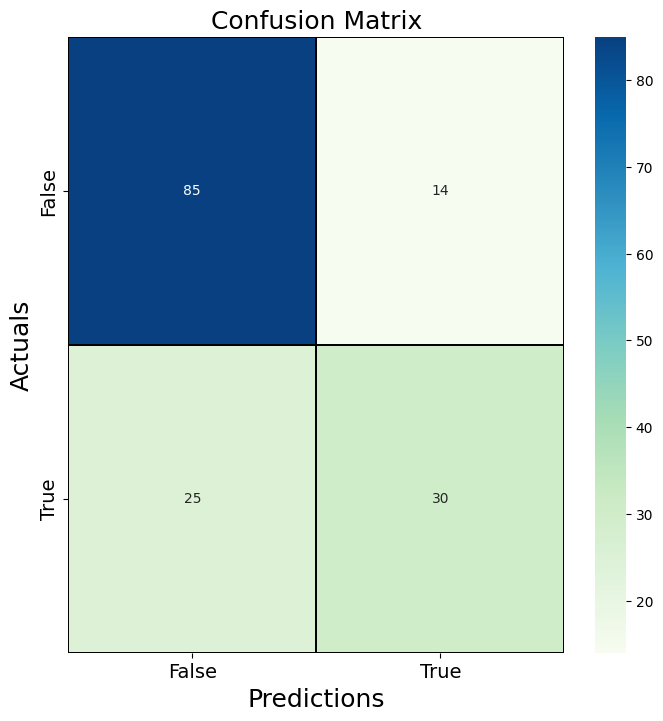

In [20]:

# Sid Logistic Regression
svm = SupportVectorMachine.SVC(probability=True)
svm.fit(x_tr, y_tr)

svmPreds = svm.predict(x_te)
print("Support Vector Machine Accuracy: ", metrics.accuracy_score(y_te, svmPreds))
make_confusion_matrix(y_te, svmPreds)


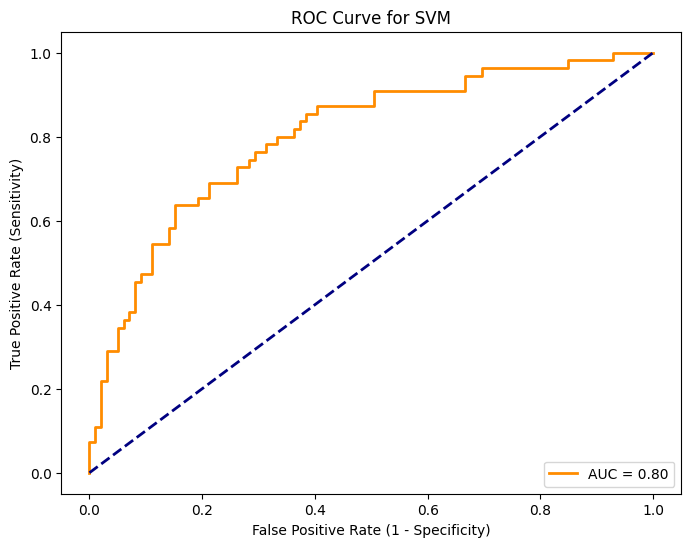

In [21]:
# Predict probabilities for positive class
svm_probs = svm.predict_proba(x_te)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_te, svm_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()

In [22]:
import numpy as np

from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix

eval_dataset = Pool(x_te,
                    y_te)

model = CatBoostClassifier(learning_rate=0.01,
                           depth=6,
                           iterations=500,
                           l2_leaf_reg=3,
                           eval_metric='AUC')

model.fit(x_tr,
          y_tr,
          eval_set=eval_dataset,
          verbose=False)


{'learn': {'Logloss': 0.3126904807426642}, 'validation': {'Logloss': 0.49143979453208375, 'AUC': 0.8229568411386593}}
[[85. 14.]
 [20. 35.]]


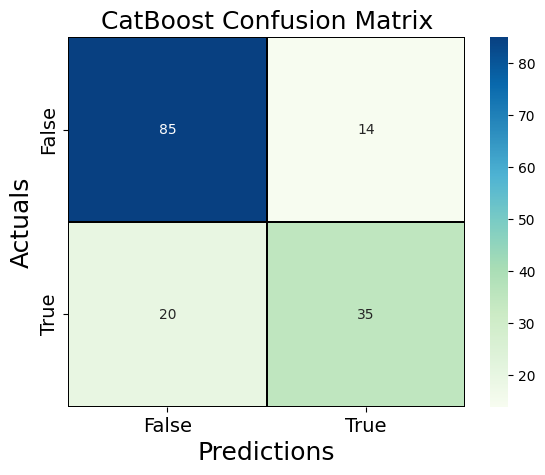

catboost Acc :  0.7792207792207793


In [23]:

print(model.get_best_score())
cm = get_confusion_matrix(model, eval_dataset)
print(cm)
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
ax = seaborn.heatmap(cm, annot=True,
        cmap=plt.cm.GnBu, fmt='g', 
        linewidths=0.1, linecolor='black')
ax.xaxis.set_ticklabels(['False', 'True'], fontsize=14)
ax.yaxis.set_ticklabels(['False', 'True'], fontsize=14)
ax.set_xlabel('Predictions', fontsize=18)
ax.set_ylabel('Actuals', fontsize=18)
ax.set_title('CatBoost Confusion Matrix', fontsize=18)
plt.show()
print("catboost Acc : ", predict_accuracy_on_test_set)

AUC Score:  0.8229568411386593


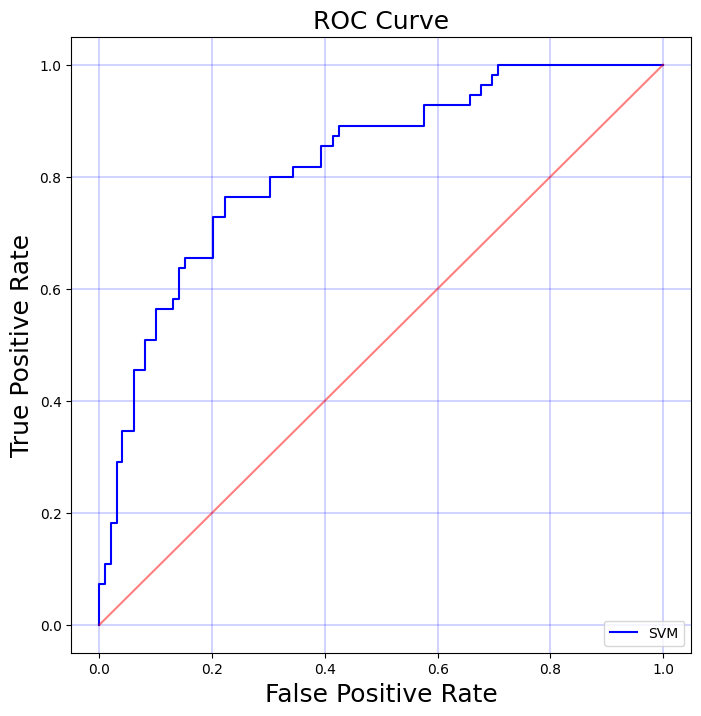

In [24]:
 make_roc_curve(model, "SVM")

In [25]:
y_pred_proba = model.predict_proba(x_te)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_te, y_pred_proba)

print("AUC Score: {:.4f}".format(auc_score))

AUC Score: 0.8230


In [26]:
feature_importance = model.get_feature_importance()

# Pair features with their importance scores
features_with_importance = list(zip(model.feature_names_, feature_importance))

# Sort features based on importance
features_with_importance.sort(key=lambda x: x[1], reverse=True)

# Print the feature importance scores
for feature, importance in features_with_importance:
    print(f"{feature}: {importance}")

Glucose: 38.09217363488323
BMI: 23.533785323409724
DiabetesPedigreeFunction: 12.367782821084681
Insulin: 11.123915490699599
SkinThickness: 8.903552626617845
BloodPressure: 5.978790103304944


AUC Score:  0.8229568411386593


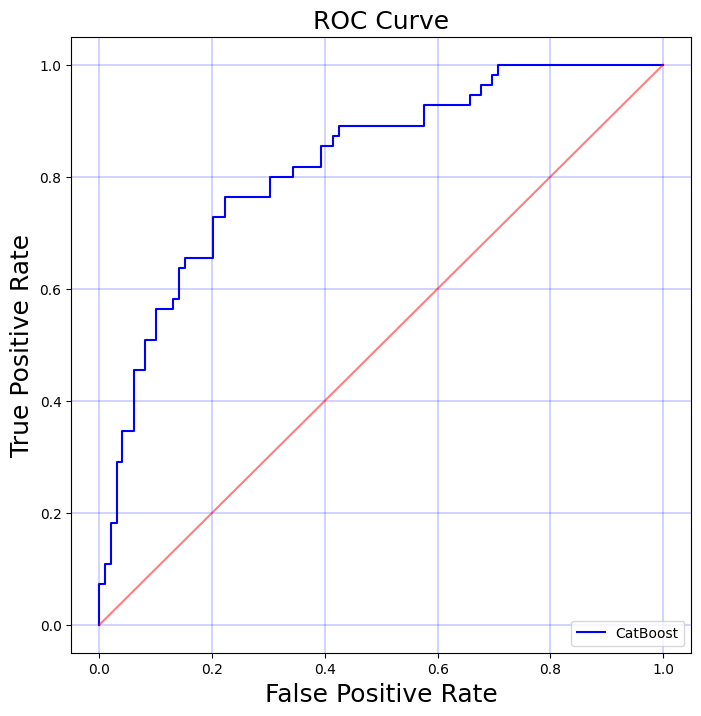

In [27]:
 make_roc_curve(model, "CatBoost")

{'learn': {'Logloss': 0.3126904807426642}, 'validation': {'Logloss': 0.49143979453208375, 'AUC': 0.8229568411386593}}
[[85. 14.]
 [20. 35.]]


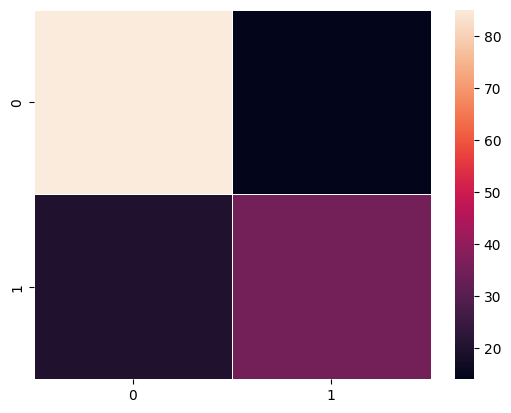

catboost Acc :  0.7792207792207793


In [45]:
eval_dataset = Pool(x_te,
                    y_te)

model = CatBoostClassifier(learning_rate=0.01,
                           depth=6,
                           iterations=500,
                           l2_leaf_reg=3,
                           eval_metric='AUC')

model.fit(x_tr,
          y_tr,
          eval_set=eval_dataset,
          verbose=False)


print(model.get_best_score())
cm = get_confusion_matrix(model, eval_dataset)
print(cm)
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
ax = seaborn.heatmap(cm, linewidth=0.5)
plt.show()
print("catboost Acc : ", predict_accuracy_on_test_set)

In [49]:
def make_confusion_matrix(test, pred):
    conf_mat = confusion_matrix(test, pred)
    plt.figure(figsize=(8, 8))
    ax = seaborn.heatmap(conf_mat, annot=True,
        cmap=plt.cm.GnBu, fmt='g', 
        linewidths=0.1, linecolor='black')
    ax.xaxis.set_ticklabels(['False', 'True'], fontsize=14)
    ax.yaxis.set_ticklabels(['False', 'True'], fontsize=14)
    ax.set_xlabel('Predictions', fontsize=18)
    ax.set_ylabel('Actuals', fontsize=18)
    ax.set_title('SVM Confusion Matrix', fontsize=18)
    plt.show()
    
    
    ax = seaborn.heatmap(conf_mat, annot=True,
        cmap=plt.cm.GnBu, fmt='g', 
        linewidths=0.1, linecolor='black')

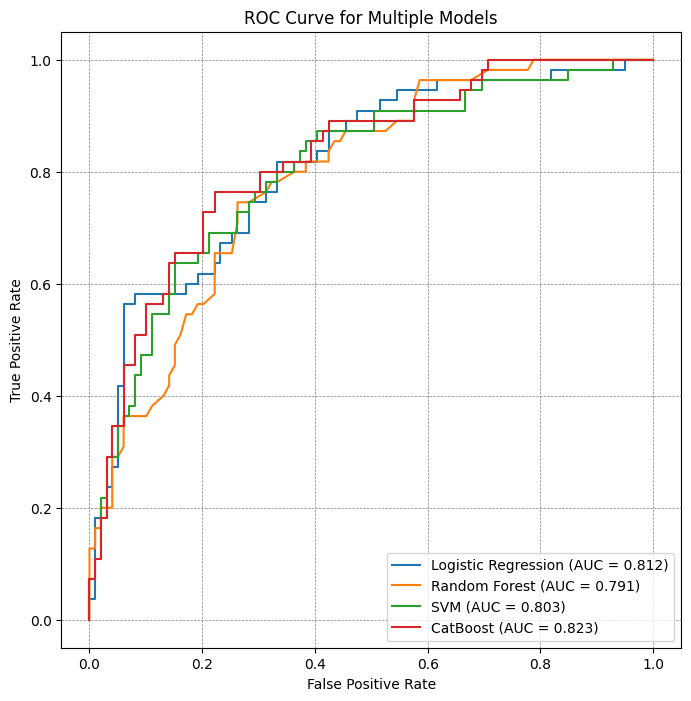

In [52]:
models = [logisticRegr, forest, svm, model]

labels = ['Logistic Regression', 'Random Forest', 'SVM', 'CatBoost']

plt.figure(figsize=(8, 8))

for model, label in zip(models, labels):
    pred_prob = model.predict_proba(x_te)[:, 1]
    fpr, tpr, _ = roc_curve(y_te, pred_prob, pos_label=1)
    auc_score = roc_auc_score(y_te, pred_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.3f})')

plt.title('ROC Curve for Multiple Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()